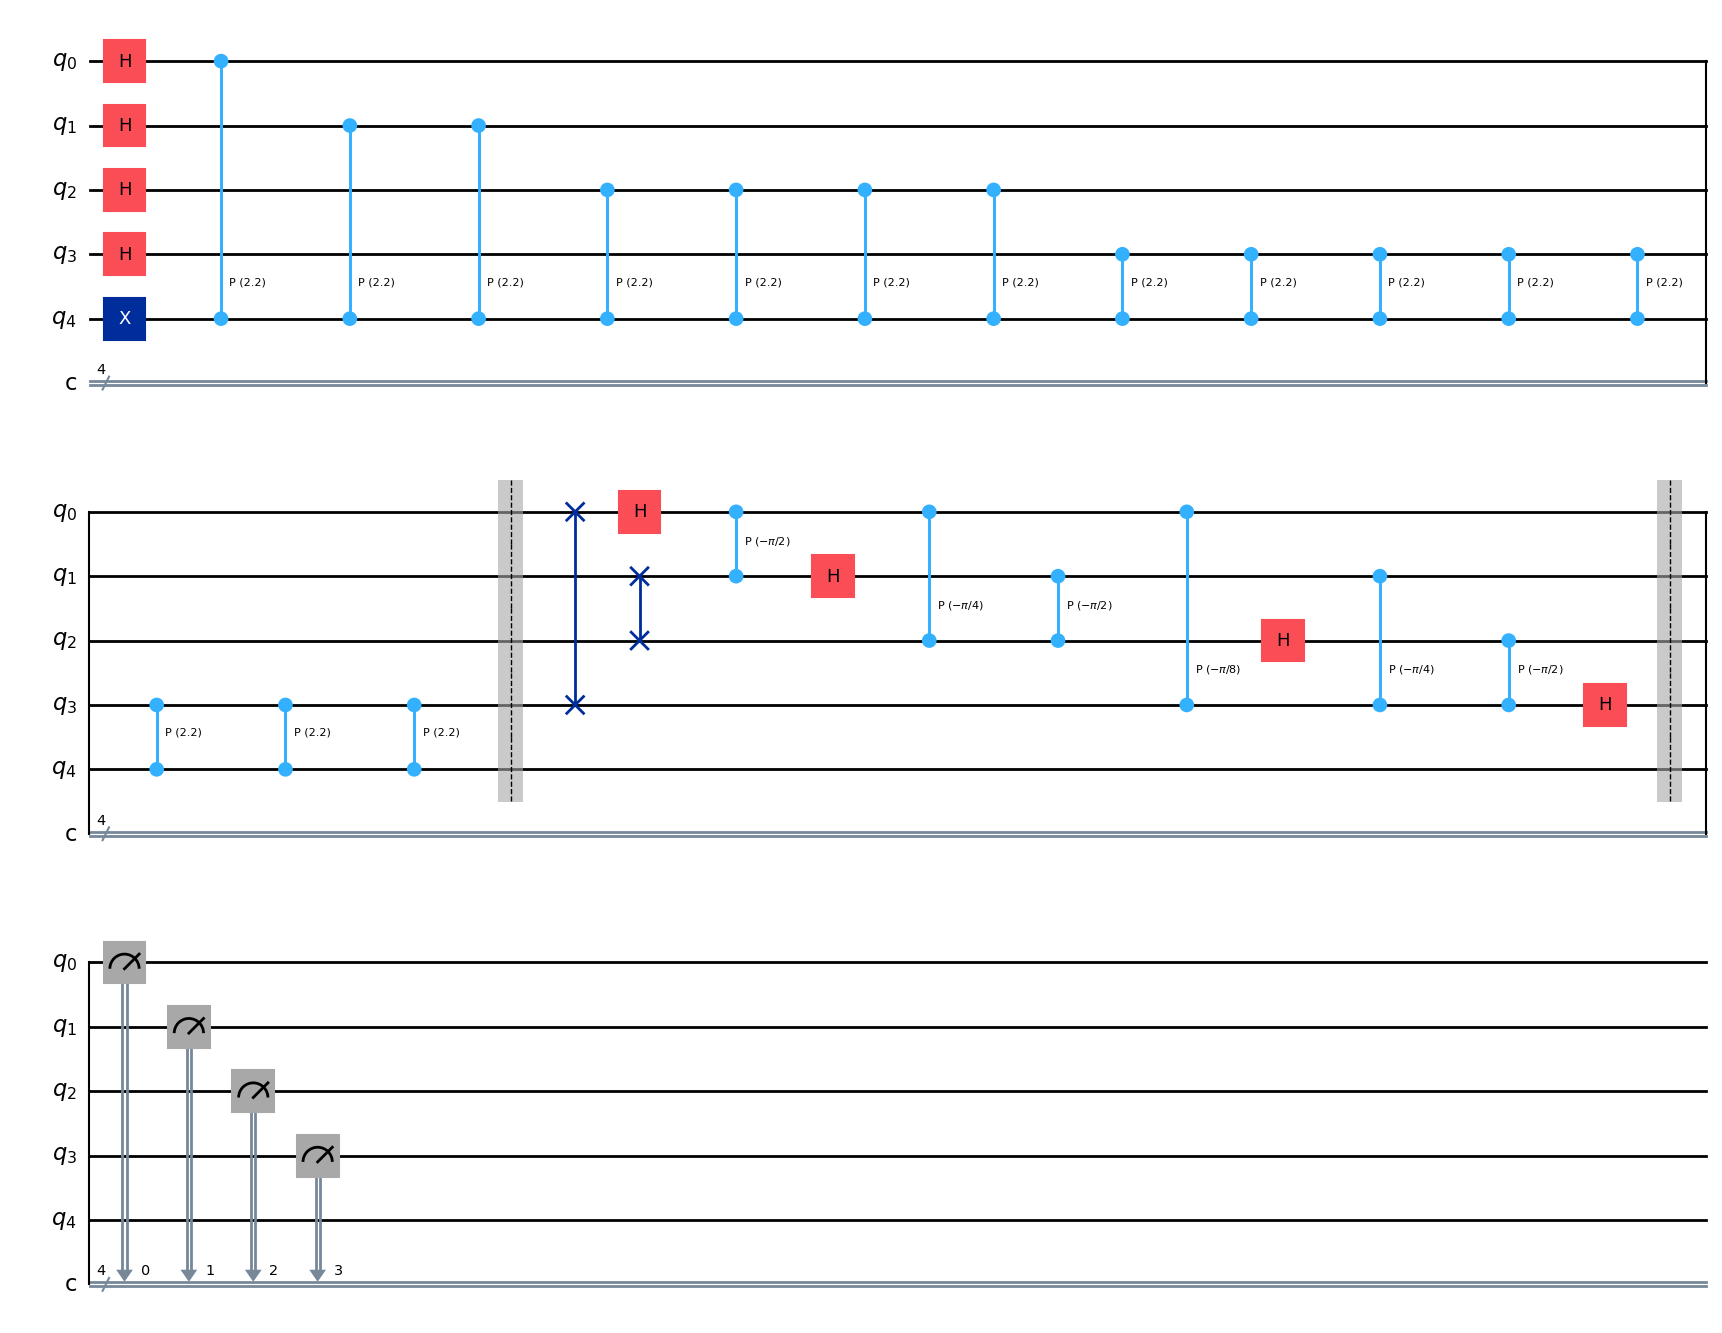

In [ ]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
# Qiskitから必要なモジュールをインポート
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram

import warnings
warnings.simplefilter('ignore')

# 逆量子フーリエ変換関数を用意
# インデックス i の量子ビットに対して、必要な制御位相シフト（cp ゲート）とアダマール（h）ゲートを適用し、逆QFTの操作を実現します。
def qft_rotate_single_inv(circuit, i, n):
    if n == 0:
        return circuit
    for qubit in range(0, i):
        circuit.cp(-pi/2**(i - qubit), qubit, i)
    circuit.h(i)

# 全体の逆QFTを実装するため、まず量子ビットの順序を反転（swap）し、その後、各ビットに対して qft_rotate_single_inv を適用します。
# swap操作は、QFT の結果がビット順について逆になっているために実施する処理です。
def qft_dagger(circuit, n):
    for i in range(math.floor(n/2)):
        circuit.swap(i, n - (i + 1))
    for i in range(n):
        qft_rotate_single_inv(circuit, i, n)


n_encode = 4  # 求めたい固有値の位相角をエンコードする量子ビット数
n_eigstate = 1  # 固有状態の量子ビット数
n = n_encode + n_eigstate
phase = np.random.rand() * np.pi  # ランダムな位相を生成

qc = QuantumCircuit(n, n_encode)
qc.x(n_encode)  # 固有状態を用意

for qubit in range(n_encode):
    qc.h(qubit)

# 位相推定の繰り返し
repetitions = 1
for count in range(n_encode):
    for i in range(repetitions):
        qc.cp(phase, count, n_encode)  # 直接位相を使用
    repetitions *= 2

qc.barrier()
qft_dagger(qc, n_encode)

qc.barrier()
for qubit in range(n_encode):
    qc.measure(qubit, qubit)

qc.draw(output='mpl')

True Phase: 2.20


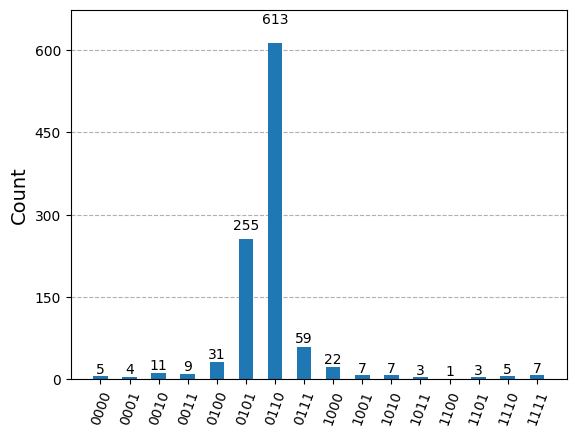

In [15]:

# # AerSimulatorを使用して実行
# simulator = AerSimulator()
# compiled_circuit = transpile(qc, simulator)
# result = simulator.run(compiled_circuit, shots=1042).result()

# # 結果を取得して表示
# answer = result.get_counts()
# print('True Phase: {:.2f}'.format(phase))
# plot_histogram(answer)

# AerSimulatorを使用して実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1042).result()

# 結果を取得して表示
answer = result.get_counts()
print('True Phase: {:.2f}'.format(phase))
plot_histogram(answer)

In [10]:

# 推定された位相角の計算
ans_idx = np.argmax(list(result.get_counts().values()))
phase_estimated = ans_idx / (2 ** n_encode)
print('True phase: {:.4f}'.format(phase / (2 * np.pi)))
print('Estimated phase: {:.4f}'.format(phase_estimated))


True phase: 0.2727
Estimated phase: 0.1875
